# Incumbency Advantage and Community Radio in Brazil
In Brazil, elected leaders are able to control approval for community radio stations. As a major source of news for Brazilian citizens, these radio stations provide a pivotal role in informing the public. This paper identifies both the causal effect of incumbency on politicians’ ability to control the media and the causal effect of media control on their future electoral prospects.


To begin, let's load in the data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
radio_df = pd.read_csv('data/applied_data.csv')
radio_df.head()

,municode,cand.id,uf,muni,name,party,yob,votes,elected,coal.votes,...,pending_yes,gini_2000,pt_pres_1998,income_2000,psdb_2000,latitude,longitude,hdi_2000,pop_2000,pt_pref_2000
0,272.0,269950.0,RO,CEREJEIRAS,IVETE KRUGER CARBONI,PFL,1959.0,156.0,0.0,1912.0,...,1.0,0.600,0.097432,253.917999,0.000000,-13.188889,60.812222,0.751,18243.880859,0.0
1,35.0,259758.0,RO,PORTO VELHO,FRANCISCO FERNANDO RODRIGUES ROCHA,PSDB,1956.0,673.0,0.0,20759.0,...,0.0,0.619,0.186628,305.204987,0.116537,-8.761945,63.903889,0.763,335338.906250,0.0
2,434.0,259951.0,RO,NOVA MAMORE,FRANCISCO ERASMO TAVEIRA DA SILVA,PP,1955.0,104.0,0.0,2025.0,...,1.0,0.695,0.063217,132.462006,0.000000,-10.401944,65.326668,0.659,14807.934570,0.0
3,434.0,261205.0,RO,NOVA MAMORE,GABRIEL JOSÉ DA SILVA,PFL,1967.0,54.0,0.0,2025.0,...,0.0,0.695,0.063217,132.462006,0.000000,-10.401944,65.326668,0.659,14807.934570,0.0
4,736.0,268283.0,RO,ALTO ALEGRE DOS PARECIS,AILTON ROQUE DE SOUZA,PSB,1965.0,49.0,0.0,543.0,...,0.0,0.518,0.103320,111.781998,0.350106,-12.128056,61.850555,0.674,12733.742188,0.0


This table contains several variables of interest, as well as many descriptive values.  


| Variable | Meaning       |
|--------|------------------------|
| muni    | Municipality Name
| name  | politician name|
| party   | political party acronym               |
| votes     | total number of votes         |
| raw.vote.margin     | the margin of votes that the candidate won or lost by         |  
| post.approved     | whether the candidate's radio application was approved following the election      |  
| elected_bool    | whether the candidate won the election       |  


We're specifically curious about close elections: if the election is close, then we can assume that external factors are relatively similar. In the following cell, set `within_250` equal to the condition that the absolute vote margin is less than 250 votes.

In [12]:
within_250 = abs(radio_df['raw.vote.margin'])<250

Great! Now, we want to plot the relationship between vote margin and the approval of a candidate's radio application after the election. In the following cell, plot the relationship under the additional condition that the candidate won the election. The plot for when the candidate did not win is filled out for you.

Text(0.5, 1.0, 'Application Approved After Election')

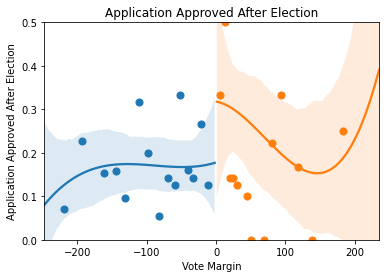

In [13]:
unelected_data = radio_df[within_250 & (~radio_df['elected'].astype(bool))]
sns.regplot(x='raw.vote.margin',y='post.approved', 
            data=unelected_data, x_ci=None, 
            order=3, x_bins=15)

elected_data = radio_df[within_250 & radio_df['elected'].astype(bool)]
sns.regplot(x='raw.vote.margin',y='post.approved', 
            data=elected_data, x_ci=None, 
            order=3, x_bins=15)
plt.ylim(0,.5)
plt.ylabel('Application Approved After Election')
plt.xlabel('Vote Margin')
plt.title('Application Approved After Election')

0      False
1      False
2      False
3      False
4      False
       ...  
708    False
709    False
710    False
711    False
712    False
Name: elected, Length: 713, dtype: bool